In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Colab Notebooks/train"

data_dir = "/content/drive/My Drive/Colab Notebooks/train"
print(data_dir)

Mounted at /content/drive
c0  c1	c2  c3	c4  c5	c6  c7	c8  c9
/content/drive/My Drive/Colab Notebooks/train


In [2]:
batch_size = 32

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2) # set validation split)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        data_dir,  # This is the source directory for training images
        target_size=(640, 480),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical',
        subset='training')

test_generator = train_datagen.flow_from_directory(
        data_dir,  # This is the source directory for training images
        target_size=(640, 480),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical',
        subset='validation')

Found 17958 images belonging to 10 classes.
Found 4485 images belonging to 10 classes.


In [3]:
import keras
keras.__version__
from keras import models
from keras import layers

In [4]:
def get_my_model ():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(640, 480, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [5]:
model = get_my_model()
model.summary()
model.compile(optimizer='Nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 638, 478, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 319, 239, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 317, 237, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 158, 118, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 156, 116, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 78, 58, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 76, 56, 64)        3

In [6]:
import pandas as pd

#Save Model and history
def save_model(history,model):
  model.save("/content/drive/My Drive/Colab Notebooks/models/")
  hist_df = pd.DataFrame(history.history) 
  hist_df.to_csv('data.csv')
  !cp data.csv "/content/drive/My Drive/Colab Notebooks/"
  return

In [7]:
def create_new_model(model):
  history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = test_generator, 
    validation_steps = test_generator.samples // batch_size,
    epochs = 5)
  save_model(history,model)
  return (history, model)

In [ ]:
#Load a model
def load_model():
  model = models.load_model("/content/drive/My Drive/Colab Notebooks/model31")
  url = 'https://drive.google.com/file/d/1-PtsT-ZwrQJCyAr6UsG2l9n8U5DJsBQW/view?usp=sharing'
  path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
  history = pd.read_csv(path)
  return (history,model)

In [10]:
#Create a new model
history_model = create_new_model(model)
history = history_model[0]
model = history_model[1]
#(history)(model) = create_new_model(model)

#Load a trained model
#history_model = load_model()
#history = history_model[0]
#model = history_model[1]
#(history)(model) = 

Epoch 1/6
561/561 [==============================] - 234s 417ms/step - loss: 0.0260 - accuracy: 0.9927 - val_loss: 0.0352 - val_accuracy: 0.9926
Epoch 2/6
561/561 [==============================] - 234s 416ms/step - loss: 0.0086 - accuracy: 0.9984 - val_loss: 0.0647 - val_accuracy: 0.9844
Epoch 3/6
561/561 [==============================] - 232s 414ms/step - loss: 0.0108 - accuracy: 0.9971 - val_loss: 0.1515 - val_accuracy: 0.9768
Epoch 4/6
561/561 [==============================] - 233s 415ms/step - loss: 0.0168 - accuracy: 0.9959 - val_loss: 0.0514 - val_accuracy: 0.9888
Epoch 5/6
561/561 [==============================] - 233s 416ms/step - loss: 0.0107 - accuracy: 0.9975 - val_loss: 0.0402 - val_accuracy: 0.9929
Epoch 6/6
561/561 [==============================] - 233s 416ms/step - loss: 0.0056 - accuracy: 0.9989 - val_loss: 0.0226 - val_accuracy: 0.9940
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/models/assets


In [32]:
import glob
import cv2
import os
import numpy as np
from keras.preprocessing import image
import PIL.Image

In [43]:
def _submission(pathPropagate_Images):
    df = pd.DataFrame({'img':[],'c0':[], 'c1':[],'c2':[], 'c3':[], 'c4':[],'c5':[], 'c6':[], 'c7':[], 'c8':[], 'c9':[]})
    for imgs in glob.glob(os.path.join(pathPropagate_Images,'*.jpg')):
        #img_cv = cv2.imread(imgs)
        #img_cv_r = cv2.resize(img_cv,(640,480))
        #img_cv_predict = np.reshape(img_cv_r,[1,640,480,3])
        img_cv_predict = image.load_img(imgs, target_size = (640, 480))
        img_cv_predict = image.img_to_array(img_cv_predict)
        img_cv_predict = np.expand_dims(img_cv_predict, axis = 0)
        arr_predict = model.predict(img_cv_predict,batch_size = 1)
        #print(imgs.split('/')[-1])
        df = df.append(
            {
                'img':imgs.split('/')[-1],
                'c0':round(arr_predict[0][0],2), 
                'c1':round(arr_predict[0][1],2),
                'c2':round(arr_predict[0][2],2),
                'c3':round(arr_predict[0][3],2),
                'c4':round(arr_predict[0][4],2),
                'c5':round(arr_predict[0][5],2),
                'c6':round(arr_predict[0][6],2),
                'c7':round(arr_predict[0][7],2),
                'c8':round(arr_predict[0][8],2),
                'c9':round(arr_predict[0][9],2)
            },
            ignore_index=True
        )
    return df

In [45]:
pathPropagate_Images = "/content/drive/My Drive/Colab Notebooks/our_samples"
our_df = _submission(pathPropagate_Images)
our_df.to_csv('our_df.csv')
!cp our_df.csv  "/content/drive/My Drive/Colab Notebooks/"

In [44]:
pathPropagate_Images = "/content/drive/My Drive/Colab Notebooks/train/c0"
c0_df = _submission(pathPropagate_Images)
c0_df.to_csv('c0_df.csv')
!cp c0_df.csv  "/content/drive/My Drive/Colab Notebooks/"

In [9]:
import matplotlib.pyplot as plt

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.ylim([0.9,1])
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim([0,.4])
plt.legend(['train','test'], loc='upper left')
plt.show()

TypeError: ignored

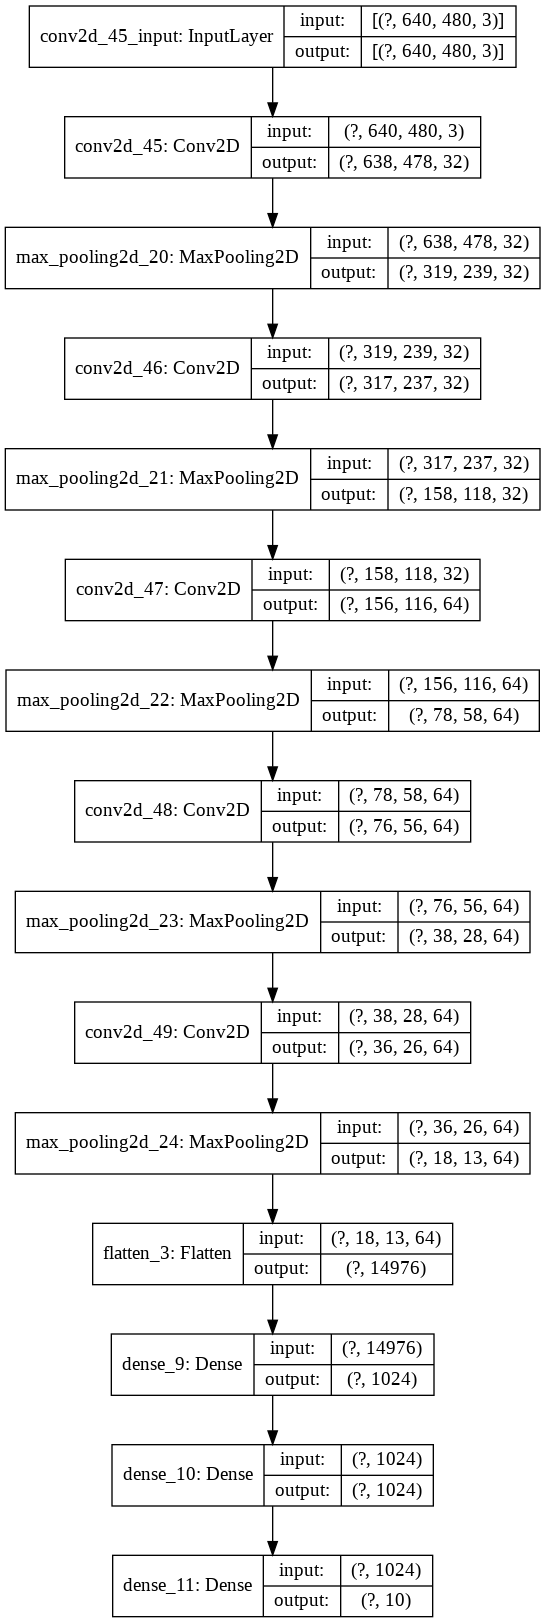

In [ ]:
keras.utils.plot_model(model,"model.png",show_shapes = True)

In [38]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img("/content/drive/My Drive/Colab Notebooks/our_samples/img_1602.jpg", target_size = (640, 480))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)
print(result)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
